# Logistic Regression

Logistic regression is a supervised machine learning algorithm widely used for classification tasks. While initially designed for binary classification, logistic regression can be also be used to handle multiclass classification using techniques such as multinomial logistic regression.

In this notebook, we apply multinomial logistic regression to classify coffee quality into three categories: Moderate Quality, Good Quality, and High Quality. These categories are derived from the Total Cup Points column, split into 3 categories based on the 33rd and 66th percentiles.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Load the dataset from the specified path into a pandas DataFrame
df = pd.read_csv("C:/Users/moham/Desktop/Data Mining and ML/data cleannnn.csv")

### Creating Quality Categories Based on Total Cup Points

In [3]:
if 'Total Cup Points/60' in df.columns:
    
    # Calculating the 33rd and 66th percentiles for Total Cup Points
    low_threshold = df['Total Cup Points/60'].quantile(0.33)
    high_threshold = df['Total Cup Points/60'].quantile(0.66)

    # Function to assign categories based on the Total Cup Points
    def categorize_quality(score):
        if score <= low_threshold:
            return 'Moderate Quality'
        elif score <= high_threshold:
            return 'Good Quality'
        else:
            return 'High Quality'

    # Applying the function to create a new columm
    df['Quality Category'] = df['Total Cup Points/60'].apply(categorize_quality)

    # Value count for each category
    print(df['Quality Category'].value_counts())
    
else:
    # Printing an error message if the column is not found
    print("Column 'Total Cup Points' not found in the dataframe.")

Moderate Quality    70
High Quality        69
Good Quality        68
Name: Quality Category, dtype: int64


### Features and target class

In [4]:
# Features
X = df[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']]

# Target class
y = df['Quality Category']

# Encoding target class as int
y = y.map({'Moderate Quality': 0, 'Good Quality': 1, 'High Quality': 2})  

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Building and training the model

In [5]:
# Building the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200, random_state=42) #multi_class='multinomial' indicates more than two output classes

# Training the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='multinomial', random_state=42)

### Testing and metrics

In [6]:
# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Moderate Quality', 'Good Quality', 'High Quality']))


Accuracy: 0.9285714285714286

Classification Report:
                   precision    recall  f1-score   support

Moderate Quality       1.00      0.94      0.97        17
    Good Quality       0.88      0.93      0.90        15
    High Quality       0.90      0.90      0.90        10

        accuracy                           0.93        42
       macro avg       0.92      0.92      0.92        42
    weighted avg       0.93      0.93      0.93        42



## Visualization

#### Confusion Matrix

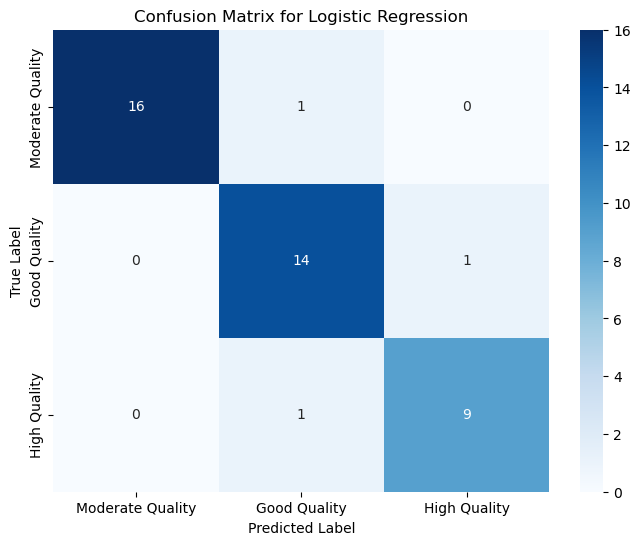

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions on test data
y_pred = model.predict(X_test)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Moderate Quality', 'Good Quality', 'High Quality'], yticklabels=['Moderate Quality', 'Good Quality', 'High Quality'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


#### Probability Distributions for Each Class


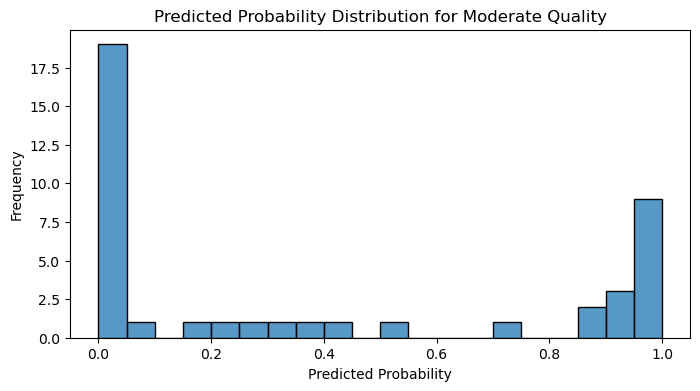

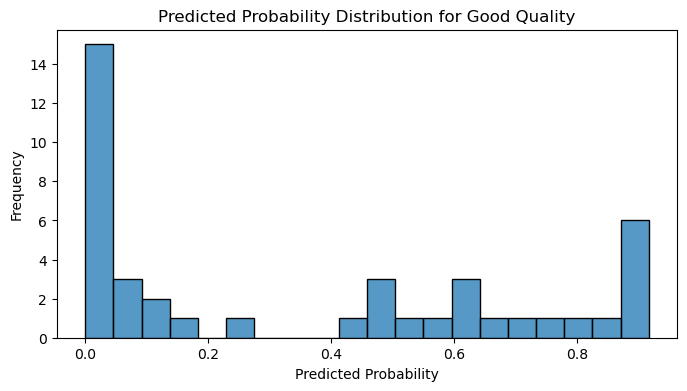

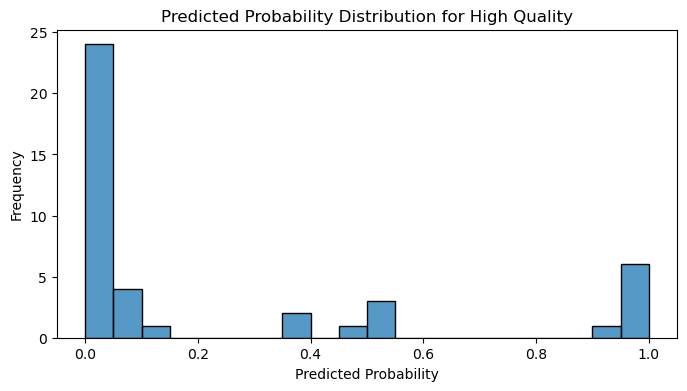

In [8]:
# Getting the predicted probabilities for each class from the model

y_proba = model.predict_proba(X_test)

for i, label in enumerate(['Moderate Quality', 'Good Quality', 'High Quality']):

    plt.figure(figsize=(8, 4))
    sns.histplot(y_proba[:, i], bins=20)
    
    plt.title(f"Predicted Probability Distribution for {label}")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Frequency")
    plt.show()

### 3. 2D Projection for Feature Pairs

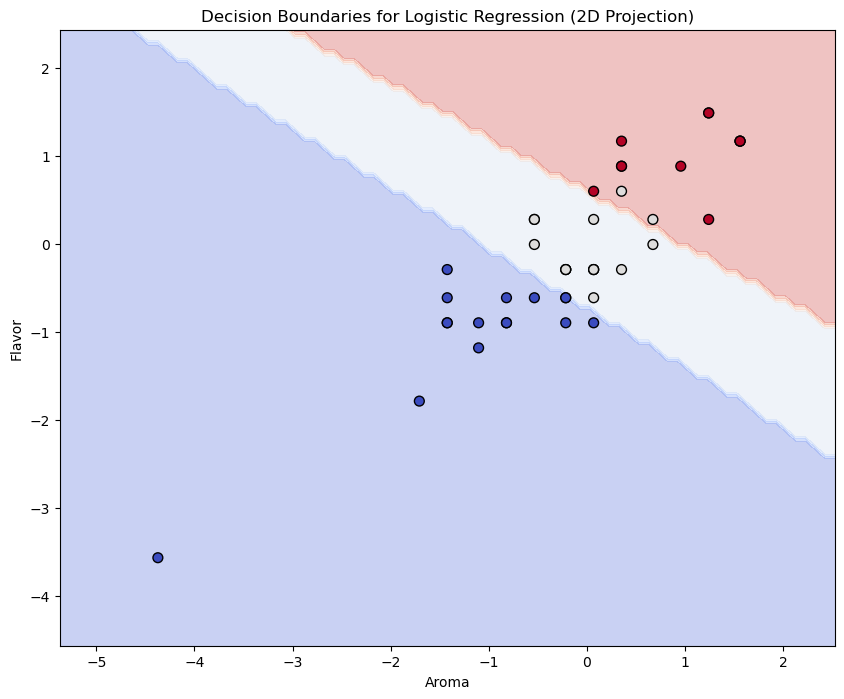

In [9]:
import numpy as np

# Select two features for simplicity (e.g., Aroma and Flavor)
X_train_2D = X_train[:, [0, 1]]  # Adjust indices based on selected features
X_test_2D = X_test[:, [0, 1]]

# Fit a logistic regression model with two features
model_2D = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_2D.fit(X_train_2D, y_train)

# Create a mesh to plot decision boundaries
x_min, x_max = X_test_2D[:, 0].min() - 1, X_test_2D[:, 0].max() + 1
y_min, y_max = X_test_2D[:, 1].min() - 1, X_test_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = model_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', s=50)
plt.xlabel("Aroma")
plt.ylabel("Flavor")
plt.title("Decision Boundaries for Logistic Regression (2D Projection)")
plt.show()
